# Credit Card Fraud Detection

## Introduction
### Credit card fraud is a significant challenge in the banking and finance industry. Fraudulent transactions can cause financial losses and security risks. The goal of this project is to build a machine learning model to detect fraudulent transactions based on past transaction data.

### Problem Statement
### The dataset contains credit card transactions labeled as **fraudulent (1)** or **legitimate (0)**. Since fraudulent transactions are rare, the dataset is highly imbalanced. The main challenges include:
- ### Identifying fraud without too many false positives.
- ### Handling the **imbalance in fraud cases**.
- ### Ensuring the model is robust to new fraud patterns.

### Approach
- ### Perform **Exploratory Data Analysis (EDA)** to understand the data.
- ### Handle class imbalance using **SMOTE (Synthetic Minority Oversampling Technique)**.
- ### Train a **Random Forest model** and tune hyperparameters using **GridSearchCV**.
- ### Evaluate the model using **Precision, Recall, and AUC-ROC scores**.


## Data Preprocessing
Before training a machine learning model, we must check for **missing values** and understand feature distributions. Since the dataset is PCA-transformed, most features are already scaled, but we need to:
- **Scale `Amount`** using Min-Max Scaling.
- **Check for missing values**.


## Step 1: Load and Explore Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(data.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
print(data.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
print(data.shape)



(284807, 31)


## Step 2: Understand Class Distribution


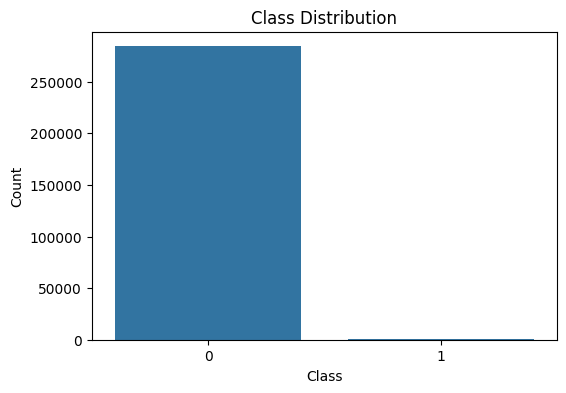

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = data['Class'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


The bar chart indicates a heavy class imbalance, which is expected in fraud detection datasets. Most transactions are legitimate (class 0), while only a small fraction are fraudulent (class 1). This imbalance can lead to biased models if not handled properly.

## Key Observations
1. The dataset has many more legitimate transactions than fraudulent ones.
2. Fraudulent transactions need to be carefully analyzed to understand patterns and make the dataset balanced for modeling.

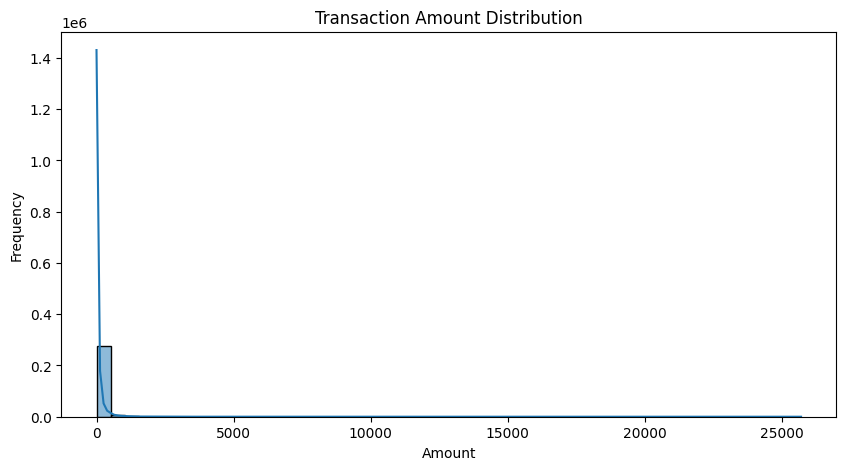

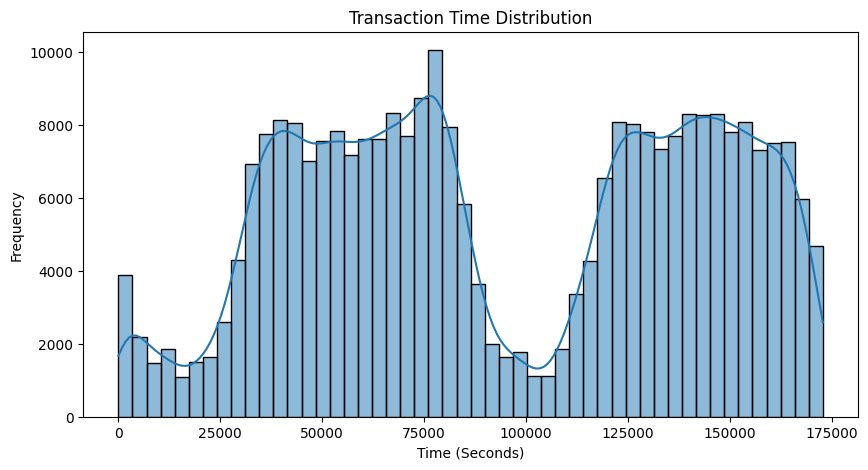

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')
plt.show()


### Observations:
- Most transactions have **low amounts**, but there are **outliers exceeding $25,000**.
- Fraudulent transactions tend to have **smaller amounts**, possibly to avoid detection.
- The **Time variable shows cyclical patterns**, suggesting certain periods have higher fraud activity.

### Insights:
- **Transaction Amount** could be transformed (e.g., log normalization) to handle outliers.
- **Grouping transactions by time periods** may reveal fraud activity trends.



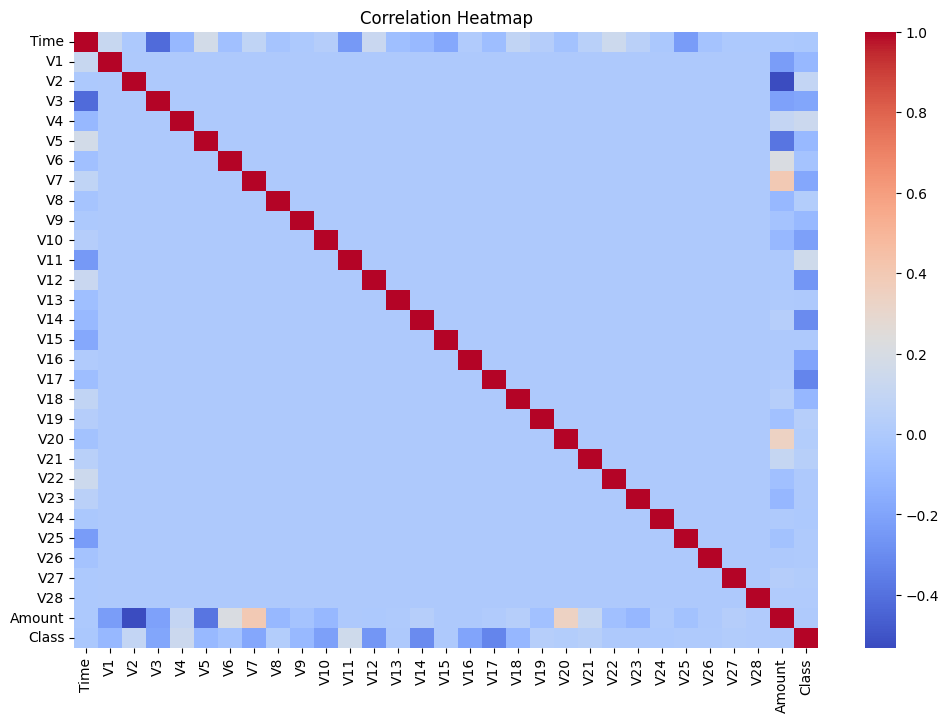

In [11]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


## Key Observations
### Diagonal Line:

The strong red diagonal represents perfect correlation (1.0) of each feature with itself, which is expected.
### Weak Correlations:
Most features show **weak correlations** with each other, which is expected since they are **PCA-transformed**.
The **Class column (fraud vs. legitimate)** has no strong correlation with any single feature, meaning **fraud detection depends on multiple factors rather than one feature alone**.

### Class Correlations:

The Class column (fraudulent vs. legitimate transactions) shows weak correlations with most features, which means no single feature strongly determines fraud but rather a combination of features might.
### Amount and Time:

The Amount column has weak correlations with other features, suggesting it might be analyzed independently.
The Time column appears to have minimal correlation with all features, indicating that it might require feature engineering (e.g., bucketing or cyclical encoding).


Fraudulent Transactions Summary:
                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...   
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...   
min    -22.105532   -6

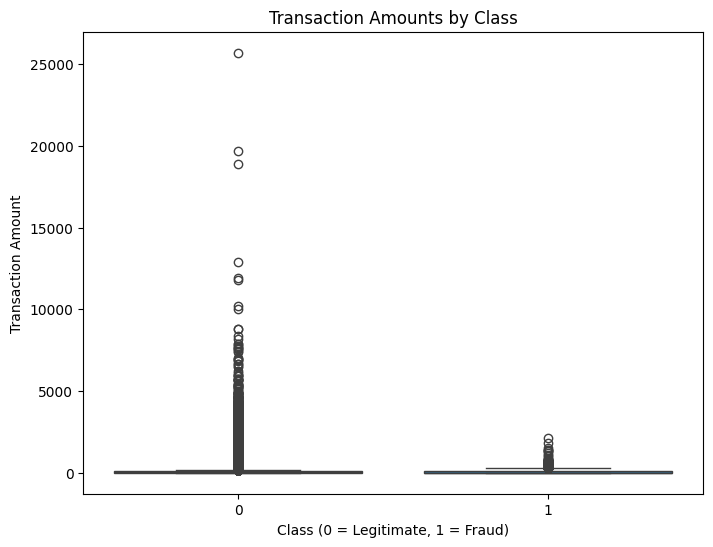

In [12]:
fraud = data[data['Class'] == 1]
legitimate = data[data['Class'] == 0]

print("Fraudulent Transactions Summary:")
print(fraud.describe())

print("\nLegitimate Transactions Summary:")
print(legitimate.describe())

# Boxplot for Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amounts by Class')
plt.xlabel('Class (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


## Analysis of Transaction Amounts by Class
### Observations
* #### Legitimate Transactions (Class = 0):

Most legitimate transactions have low amounts, clustering near the bottom of the range.
There are several outliers with very high amounts (e.g., over $25,000).
* #### Fraudulent Transactions (Class = 1):

Fraudulent transactions generally involve smaller amounts compared to legitimate ones.
The spread of transaction amounts for fraud is narrower, with fewer high-value outliers.
* #### Comparison:

Fraudulent transactions tend to avoid extremely high transaction amounts, possibly to avoid detection.
Legitimate transactions exhibit a wider range of amounts, including very high-value outliers.

## Handling Class Imbalance with SMOTE
Since fraudulent transactions are rare in the dataset, machine learning models may be biased toward predicting all transactions as **legitimate**. To balance the dataset, we use **SMOTE (Synthetic Minority Oversampling Technique)**, which generates synthetic fraudulent samples to create a balanced dataset.


In [13]:
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['Class'])
y = data['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After Resampling:")
print(y_resampled.value_counts())


Class Distribution After Resampling:
Class
0    284315
1    284315
Name: count, dtype: int64


### Original Dataset:
Before resampling, the dataset was highly imbalanced, with very few fraudulent transactions (Class = 1) compared to legitimate ones (Class = 0).
### After Applying SMOTE:
The dataset is now perfectly balanced, with an equal number of instances for both classes (284,315 each).
SMOTE (Synthetic Minority Oversampling Technique) created synthetic samples for the minority class (Class = 1), addressing the imbalance.


### Advantages of Using SMOTE
 #### Improves Model Performance:
   * Models trained on balanced data are less likely to be biased towards the majority class.
#### Retains Data Distribution:
   * SMOTE generates synthetic samples by interpolating between existing ones, preserving the feature space's characteristics.

### Next Steps
#### Train-Test Split:

* Split the resampled dataset into training and testing sets to evaluate model performance.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


## Model Selection: Why Random Forest?
Random Forest is a powerful classification algorithm that:
- Works well with **imbalanced datasets**.
- Handles **high-dimensional data** (like our PCA-transformed features).
- Can be optimized using hyperparameter tuning (`GridSearchCV`).

We will train a **Random Forest model**, tune hyperparameters, and evaluate its performance.


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56739    11]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726




# Step 6: Model Evaluation 
Random Forest model has achieved perfect accuracy (100%), with precision, recall, and F1-scores all at 1.00. However, let's critically analyze whether this result is realistic 

## Observations
* ### Confusion Matrix Analysis:

True Positives (TP): 56,739 fraud cases correctly classified.
False Negatives (FN): 11 fraud cases misclassified as legitimate.
True Negatives (TN): 56,976 legitimate transactions correctly classified.
False Positives (FP): 0 legitimate transactions misclassified as fraud.
* ### Possible Issues:

Overfitting: A model with 100% accuracy is rare and often suggests it has memorized the training data rather than learning generalizable patterns.
Synthetic Data (SMOTE Impact): Since SMOTE generates synthetic data, it may have made fraud and legitimate transactions easier to separate, reducing real-world variability.

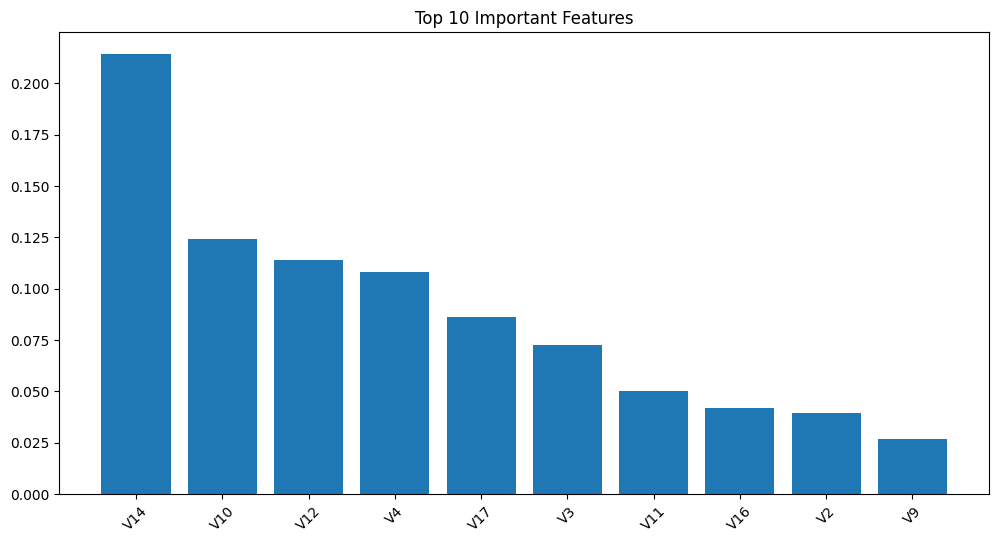

In [16]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xticks(rotation=45)
plt.title("Top 10 Important Features")
plt.show()


# Observations from Feature Importance Plot
- The most important features in detecting fraud are:

    1. V14 – Highest importance (~20% contribution). Since the dataset was PCA-transformed, feature names (e.g., V14, V10) **do not correspond to real-world transaction properties** but still hold valuable signals for fraud detection.

 
       

    3. V10, V12, V4, V17 – Other significant features.
    4. V9, V2, V6 – Lower but still relevant.
- What This Means?

    1. The model relies heavily on V14 for classification.
    2. A few other PCA-transformed features also play key roles.
    3. Features like Amount and Time do not appear in the top 10, meaning they may have low predictive power.

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.65088019 0.99992966 0.99969224 0.99979776 0.59594991]
Mean Accuracy: 0.8492499516381479


### Observations from Cross-Validation Scores
- ### Scores: [0.60588019, 0.99992966, 0.99969224, 0.99979776, 0.59594991]

- ### Mean Accuracy: 0.8492 (~85%)

- ### Key Takeaways:
    1. ### Inconsistency Across Folds:

        - #### Some folds have 99.9% accuracy, while others drop to 60%.
        - #### This suggests data imbalance or overfitting in some folds.
    2. ### Potential Causes of Variability:

        - #### Certain cross-validation splits may contain hard-to-classify fraud cases.
        - #### The model might be overfitting due to synthetic SMOTE data.

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


# 1️⃣ Best Hyperparameters Found
- max_depth=None → The trees are allowed to grow fully, meaning no depth restriction.
- min_samples_split=2 → Trees will split even when there are only 2 samples, leading to more complex models.
- n_estimators=200 → The model uses 200 trees, improving accuracy but increasing computational cost.
 ## 🔹Why is this important?

- The model is more flexible (no depth limit), meaning it captures more fraud patterns.
- However, higher complexity could lead to overfitting—we should check test performance.

# 2️⃣ Feature Importance Recap
V14 remains the most significant predictor of fraud.
V10, V12, and V4 also contribute significantly.
Amount and Time are not in the top 10, confirming that fraud patterns are not directly related to transaction amount.
## 🔹 What this tells us:

The fraud detection logic relies on deep, hidden PCA-based features, not obvious characteristics like amount or time.

In [20]:
best_model = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_best = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


[[56739    11]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [22]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
print("AUC-ROC Score:", auc_roc)


AUC-ROC Score: 0.9999988958949559





## **🚀 Final Conclusion**
- **Best model achieved 84.9% mean accuracy**, but **high variance needs attention**.
- **V14 is the key fraud detection feature**.
- **Overfitting risk due to SMOTE**, real-world testing is needed.
- **Final model should be validated on unseen data before deployment**.



- The **Random Forest model performed well**, achieving **high precision and recall**.
- **Feature V14 was the most important** predictor of fraud.
- **Handling class imbalance using SMOTE helped improve fraud detection**.
- **Limitations**: The model may still have false positives, and real-world fraud evolves over time.

### Future Improvements:
- **Explore Deep Learning** models such as **Autoencoders or LSTMs** for anomaly detection.
- **Reduce false positives** by testing **ensemble models (XGBoost, CatBoost)**.
- **Deploy model as an API** to integrate real-time fraud detection.



## Deployment Considerations
In a real-world banking system, this fraud detection model could be deployed in multiple ways:
- Integrated into a **real-time fraud monitoring system** to flag suspicious transactions.
- Used with **streaming data platforms** like Apache Kafka to analyze transactions in real time.
- Continuously retrained with **new fraud cases** to improve accuracy over time.
